In [1]:
using PyPlot
using SymPy

# __Ejercicio 1:__
Implementar método implicito de Euler como quieran.

In [2]:
x=symbols("x")
t=symbols("t");

In [3]:
function Newton(f,x0,t) 
listx=[]
df(y,t)=N(diff(f(x,t),x))              #Obtenermos la derivada respecto de x
    while abs(f(x0,t))>0.000001
        x0=x0-f(x0,t)/df(x0,t)         #Aplicamos el método de Newton
        push!(listx,x0)                #Se guardaran los valores x0 en listx
    end    
    x0
end

Newton (generic function with 1 method)

In [4]:
function Euler_implicito(f,x0,t0,t,h)
    listt=t0:h:t                         # Arreglo de los valores t0< x < tf
    listx=zeros(length(listt))           # Aquí se guardan los valores de la aproximación
    listx[1] = x0                        # Primer valor es la condición inicial
    for i in 2:length(listt)
        g(x,s)=x-h*f(x,listt[i-1])-x0    # Función de la que obtendremos la raiz  
        x0=x0+h*f(Newton(g,x0,listt[i-1]),listt[i])     # Se aplica el Método de Newton
        listx[i]=x0
    end
    return listt,listx
    end;

In [5]:
#Función para realizar la prueba
f(x,t)=2*x*t;

In [6]:
ins,sni=Euler_implicito(f,1.0,1.0,2.0,0.1)
#plot(ins,sni, label="Euler implicito")

#Se anexa la solución exacta
t=linspace(1.0,2,300)
#plot(t,exp.(t.^2-1),label="Solución")
#legend();

# __Ejercicio 2:__
Implementar Euler: Regla del punto medio.

In [7]:
function Euler_punto_medio(f,x0,t0,tf,h)
    listt=t0:h:tf                      # Arreglo de los valores de x t0< x < tf
    listx=zeros(length(listt))         # Aquí se guardan los valores de la aproximación
    listx[1]=x0                        # El primer elemento es x0
    for i in 2:length(listt)
        x0=x0+h*f(x0+(0.5*h)f(x0,listt[i-1]),listt[i-1]+h/2)
        listx[i]=x0
    end
    return listt,listx
end

Euler_punto_medio (generic function with 1 method)

In [8]:
#Función para realizar la prueba
f(x,t)=2x*t;

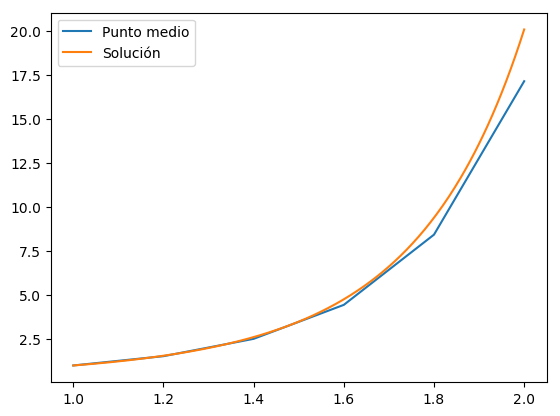

In [9]:
intervalo,solucion=Euler_punto_medio(f,1.0,1.0,2,0.2)
plot(intervalo,solucion,label="Punto medio")

#Se anexa la solución exacta
t=linspace(1.0,2,300)
plot(t,exp.(t.^2-1),label="Solución")
legend();

# __Ejercicio 3:__ 
Implementar método de Runge-Kutta de orden 4.

In [10]:
function Runge_Kutta_4(f,x0,to,tf,h)
    listt=to:h:tf
    listx=zeros(length(listt)) #Aquí se guardan los valores de la aproximación.
    listx[1] = x0
    
    for i in 2:length(listt)
    
    #Pasos a seguir en el R.K.4
    k1=f(x0,listt[i-1])
    k2=f(x0+(h/2)*k1,listt[i-1]+h/2) 
    k3=f(x0+(h/2)*k2,listt[i-1]+h/2) 
    k4=f(x0+h*k3,listt[i-1]+h)
        
    #Utilizando los valores anteriores, se tiene la aproximación    
    x0=x0+(h/6)*(k1+2k2+2k3+k4)
    listx[i] = x0     
        
    end
    return listt,listx
end

Runge_Kutta_4 (generic function with 1 method)

In [11]:
#Función para realizar la prueba
f(x,t)=2x*t;

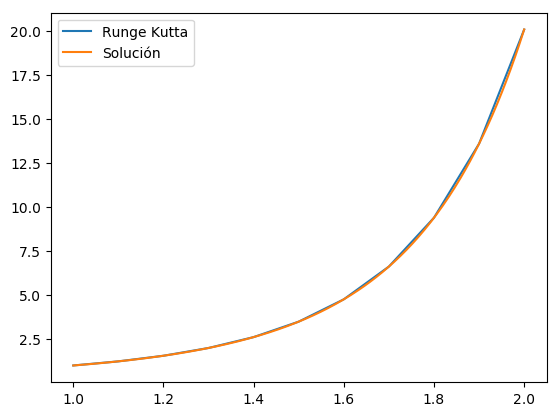

In [12]:
inter,soluc=Runge_Kutta_4(f,1.0,1.0,2.0,0.1)
plot(inter,soluc,label="Runge Kutta")

#Se anexa la solución exacta
t=linspace(1.0,2.0,300)
plot(t,exp.((t.^2)-1),label="Solución")
legend();

# __Ejercicio 4:__ 
Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. 


In [13]:
#Método explicito
function Euler(f,x0,t0,tf,h)
    listt=t0:h:tf                #Arreglo de los valores de x t0< x < tf
    listx=zeros(length(listt))   #Aquí se guardan los valores de la aproximación.
    listx[1] = x0                #El primer elemento es x0. 
    for i in 2:length(listt)   
        x0 = x0 + h * f(listx[i-1],listt[i-1]) 
        listx[i] = x0                
        end                      
    return listt,listx            #La función nos devuelve el intervalo y la aproximación. 
    end;

__La ecuación es $\frac{dx}{dt}=-2.5 x, x(0)=1\ t\in(0,8), h=1.0,0.5,0.2,0.01$__

In [14]:
f(x,t)=-2.5*x;

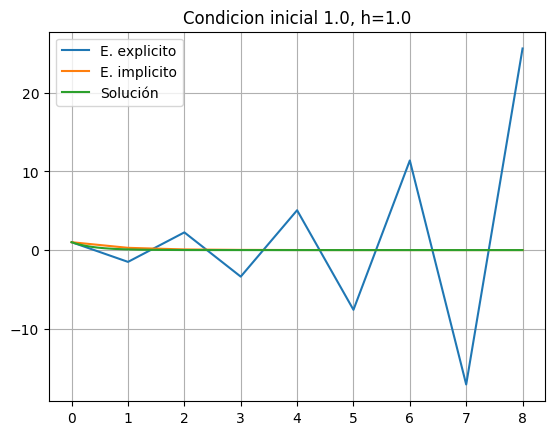

In [15]:
#Con h=1.0, x(0)=1
s,r=Euler(f,1.0,0.0,8.0,1.0)
ss,rr=Euler_implicito(f,1.0,0.0,8.0,1.0)
plot(s,r,label=("E. explicito"))
plot(ss,rr,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t),label=("Solución"))

title("Condicion inicial 1.0, h=1.0")
legend(),grid("on");

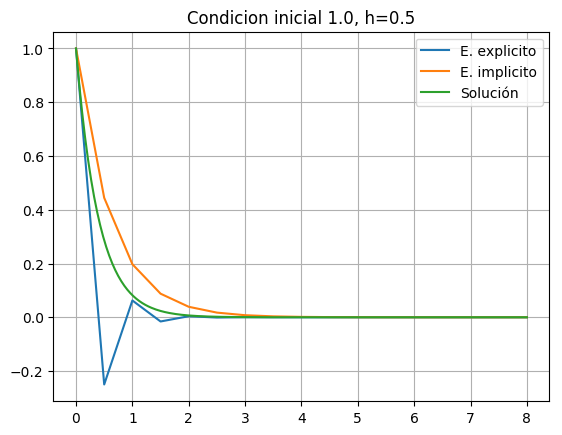

In [16]:
#Con h=0.5, x(0)=1
s1,r1=Euler(f,1.0,0.0,8.0,0.5)
ss1,rr1=Euler_implicito(f,1.0,0.0,8.0,0.5)
plot(s1,r1,label=("E. explicito"))
plot(ss1,rr1,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t),label=("Solución"))

title("Condicion inicial 1.0, h=0.5")
legend(),grid("on");

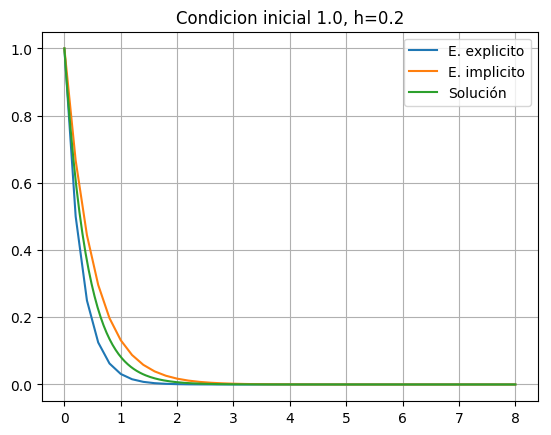

In [17]:
#Con h=0.2,  x(0)=1
s2,r2=Euler(f,1.0,0.0,8.0,0.2)
ss2,rr2=Euler_implicito(f,1.0,0.0,8.0,0.2)
plot(s2,r2,label=("E. explicito"))
plot(ss2,rr2,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t),label=("Solución"))

title("Condicion inicial 1.0, h=0.2")
legend(),grid("on");

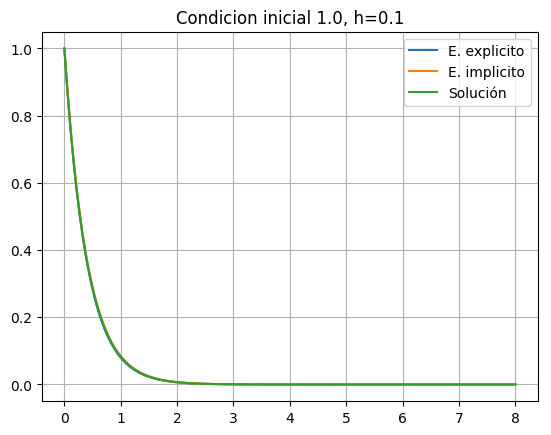

In [18]:
#Con h=0.01,  x(0)=1
s3,r3=Euler(f,1.0,0.0,8.0,0.01)
ss3,rr3=Euler_implicito(f,1.0,0.0,8.0,0.01)
plot(s3,r3,label=("E. explicito"))
plot(ss3,rr3,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t),label=("Solución"))

title("Condicion inicial 1.0, h=0.1")
legend(),grid("on");

__La ecuación es__ $\frac{dx}{dt}=-2.5 x, x(0)=2\ t\in(0,8), h=1.0,0.5,0.2,0.01$

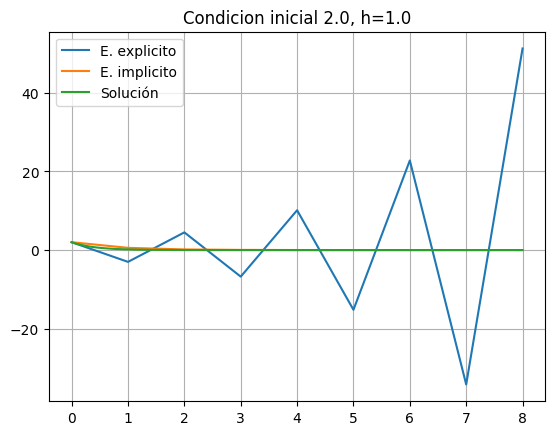

In [19]:
#Con h=1.0,  x(0)=2
s,r=Euler(f,2.0,0.0,8.0,1.0)
ss,rr=Euler_implicito(f,2.0,0.0,8.0,1.0)
plot(s,r,label=("E. explicito"))
plot(ss,rr,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t+log(2)),label=("Solución"))

title("Condicion inicial 2.0, h=1.0")
legend(),grid("on");

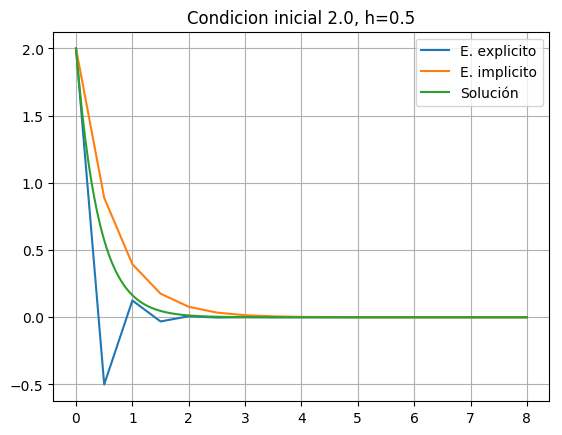

In [20]:
#Con h=0.2, x(0)=2
s2,r2=Euler(f,2.0,0.0,8.0,0.5)
ss2,rr2=Euler_implicito(f,2.0,0.0,8.0,0.5)
plot(s2,r2,label=("E. explicito"))
plot(ss2,rr2,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t+log(2)),label=("Solución"))

title("Condicion inicial 2.0, h=0.5")
legend(),grid("on");

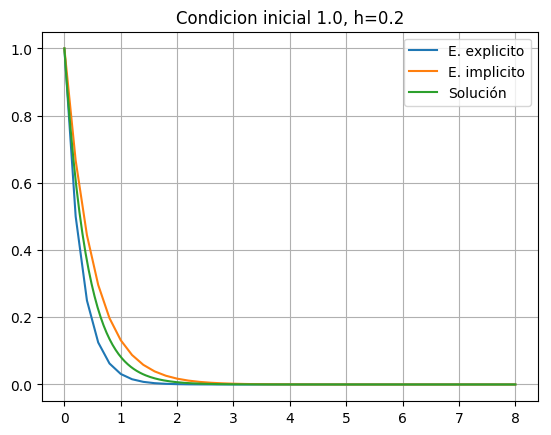

In [21]:
#Con h=0.01, x(0)=2
s3,r3=Euler(f,1.0,0.0,8.0,0.2)
ss3,rr3=Euler_implicito(f,1.0,0.0,8.0,0.2)
plot(s3,r3,label=("E. explicito"))
plot(ss3,rr3,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t),label=("Solución"))

title("Condicion inicial 1.0, h=0.2")
legend(),grid("on");

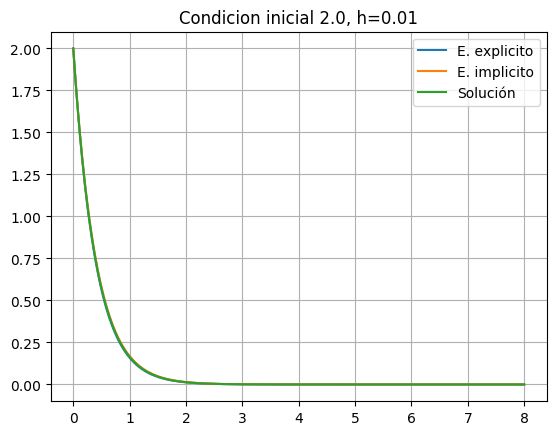

In [22]:
#Con h=0.01, x(0)=2
s3,r3=Euler(f,2.0,0.0,8.0,0.01)
ss3,rr3=Euler_implicito(f,2.0,0.0,8.0,0.01)
plot(s3,r3,label=("E. explicito"))
plot(ss3,rr3,label=("E. implicito"))

#Solución exacta
t=linspace(0.0,8.0,300)
plot(t,exp.(-2.5*t+log(2)),label=("Solución"))

title("Condicion inicial 2.0, h=0.01")
legend(),grid("on");

Al final de comparar los dos métodos, el Explicito y el Implicito, junto con la solución exacta, podemos ver que el método Implícito tiene una mejor aproximación

# __Ejercicio 5__: 
Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

In [23]:
g(x,t)= (2x-18t)/(1+t)  #Ecuación a resolver

g (generic function with 1 method)

In [24]:
intervalo1,solucion1=Euler_punto_medio(g,4.0,0.0,10.0,1)
intervalo2,solucion2=Runge_Kutta_4(g,4.0,0.0,10.0,1.0);

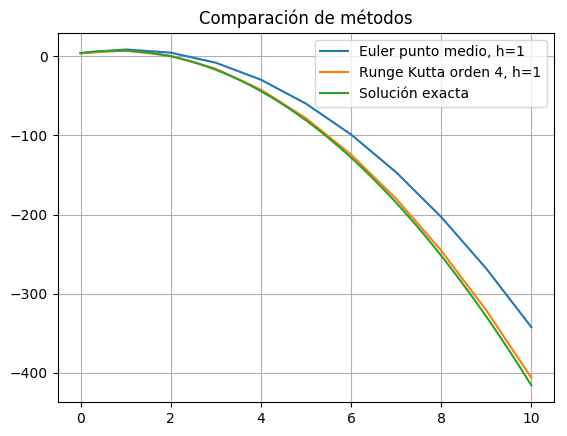

In [25]:
plot(intervalo1,solucion1, label="Euler punto medio, h=1")
plot(intervalo2,solucion2, label="Runge Kutta orden 4, h=1")

#Se anexa la solución exacta
t = linspace(0,10,100)
plot(t,4+8*t.-5*t.^2,label="Solución exacta")

title("Comparación de métodos")
legend(),grid("on");


# __Ejercicio 6__: 
Grafique la energía total del oscilador armonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

__Utilizando Método de Euler__

In [26]:
# Utilizando la función vista en clase, Euler independiente de las dimensiones
function metodo_euler(f,list,x0)    
    x = x0                          
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                      # Se guardarán los resultados obtenidos 
    push!(listx,x)                  
    for i in 2:length(list)         # Empezamos en 2, porque el primer elemento ya se anexo
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x)              
    end
    return listx                    # La función metodo_euler regresa listx
end

metodo_euler (generic function with 1 method)

In [27]:
f(x,t) = [x[2], -x[1]] #La función a trabajar considerando k=1
list=0.0:0.1:10.0

oscilador=metodo_euler(f,list,[1,0])   

#Sustraemos
listp1 = map(x->x[1],oscilador)     # Posición 
listv1 = map(x->x[2],oscilador);    #Velocidad    

In [28]:
# Se calcularán las energías potencial y cinética

function e_potencial(k,listax)    
    U = (1/2)*k*listax.^2
    return U
end 

function e_cinética(m,listav)
    K = (1/2)*m*listav.^2
    return K
end
;

In [29]:
#Energía potencia
Potencial1 = e_potencial(1,listp1)

#Energía potencial
Cinetica1 = e_cinética(1,listv2)

#Obtenemos la energía total al sumar las dos anteriores
E_total=Potencial1+Cinetica1;  

LoadError: [91mUndefVarError: listv2 not defined[39m

In [30]:
xlabel("t"),ylabel("Energía")
title("Energía del oscilador armónico") 

plot(list,Potencial1,label="Energía potencial")     
plot(list,Cinetica1,label = "Energía cinética")
plot(list,E_total,label = "Energía total");

legend();

LoadError: [91mUndefVarError: Cinetica1 not defined[39m

__Utilizando Método de Runge Kutta 4 orden__

In [31]:
function R_Kutta_4(f,list,x0)    
    x = x0                          
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                     
    push!(listx,x)                  # Agregamos al arreglo listx, el punto inicial 
    for i in 2:length(list)         
        t = i*h                     #Se aplica el método de R.K.4
        x = x+(h/6)*(f(t,x)+2(f(t+h/2,x+(h/2)*f(t,x)))+2(f(t+h/2,x+(h/2)*f(t+h/2,x+(h/2)*f(t,x))))+(f(t,x+h*f(t+h/2,x+(h/2)*f(t+h/2,x+(h/2)*f(t,x))))))
        push!(listx,x)              
    end
    return listx                    
end
;

In [32]:
f(t,x) = [x[2], -x[1]]    
list=0.0:0.1:10        # Intervalo de tiempo
oscilador = R_Kutta_4(f,list,[1,0]) 

#Sustraemos
listp2 = map(x->x[1],oscilador)          # Posición 
listv2 = map(x->x[2],oscilador);          # Velocidad

In [33]:
#Utilizando las fórmulas de Energía descritas arriba

Potencial2 = e_potencial(1,listp2)
Cinetica2 = e_cinética(1,listv2)
E_total2=Potencial2+Cinetica2;

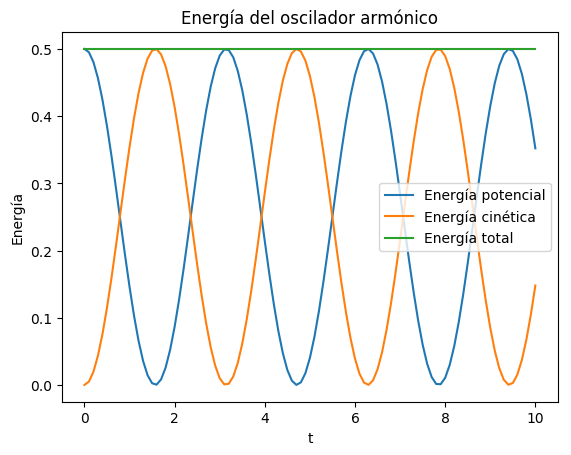

In [34]:
xlabel("t"),ylabel("Energía")
title("Energía del oscilador armónico") 

plot(list,Potencial2,label="Energía potencial")     
plot(list,Cinetica2,label = "Energía cinética")
plot(list,E_total2,label = "Energía total");

legend();

Al aplicar ambos métodos pudimos notar, que con el Método de Euler, la energía total va aumentando mientras pasa el tiempo, vemos que no hay conservación de energía.

Por otro lado vemos que la energía total en el Método de Runge Kutta de 4 orden, el resultado es una constante, apreciamos la conservación de energía.

# Ejercicio 7:

Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaría graficar $(x,p)$. Nota: Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos listx y listv, bastará con hacer plot(listx,listv).

Utilizando el método explícito de Euler


__Utilizando Euler__

Utilizando el ejercicio anterior, ya teniamos nuestras listas para la posición y velocidad.

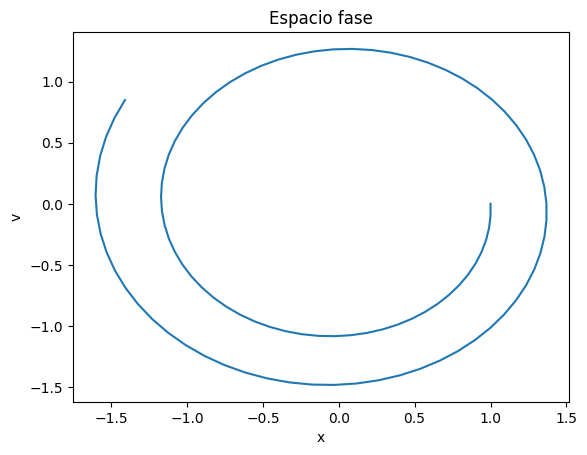

In [35]:
plot(listp1,listv1)
xlabel("x"),ylabel("v")
title("Espacio fase")
;

__Utilizando R.K.4__

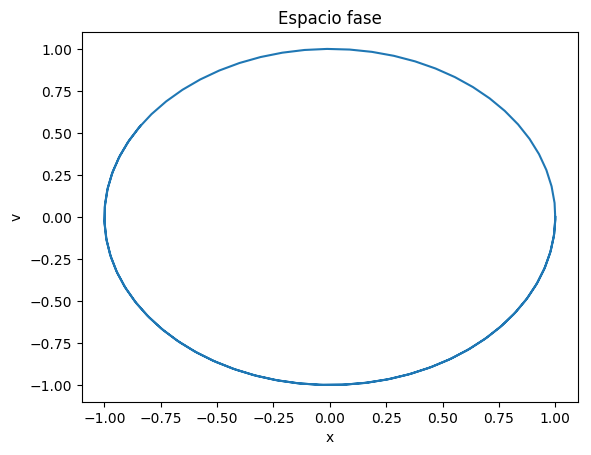

In [36]:
plot(listp2,listv2)
xlabel("x"),ylabel("v")
title("Espacio fase")
;

__Ejercicio 8__

Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

Como p=mv, considerando m=1, se tiene que p=v.


In [37]:
oscilador1 = R_Kutta_4(f,list,[1,0]);   # x(0)=1 y v(0)=0 
listp1 = map(x->x[1],oscilador1);                 
listv1 = map(x->x[2],oscilador1);                

oscilador2 = R_Kutta_4(f,list,[2,6]);   # x(0)=2 y v(0)=6 
listp2 = map(x->x[1],oscilador2);                
listv2 = map(x->x[2],oscilador2);                
 
oscilador3 = R_Kutta_4(f,list,[5,3]);   # x(0)=5 y v(0)=3 
listp3 = map(x->x[1],oscilador3);                 
listv3 = map(x->x[2],oscilador3);                

oscilador4 = R_Kutta_4(f,list,[7,1]);   # x(0)=7 y v(0)=1 
listp4 = map(x->x[1],oscilador4);                 
listv4 = map(x->x[2],oscilador4);                

oscilador5 = R_Kutta_4(f,list,[9,1]);   # x(0)=9 y v(0)=1 
listp5 = map(x->x[1],oscilador5);               
listv5 = map(x->x[2],oscilador5);                

oscilador6 = R_Kutta_4(f,list,[10,2]);   # x(0)=10 y v(0)=2 
listp6 = map(x->x[1],oscilador6);                
listv6 = map(x->x[2],oscilador6);               

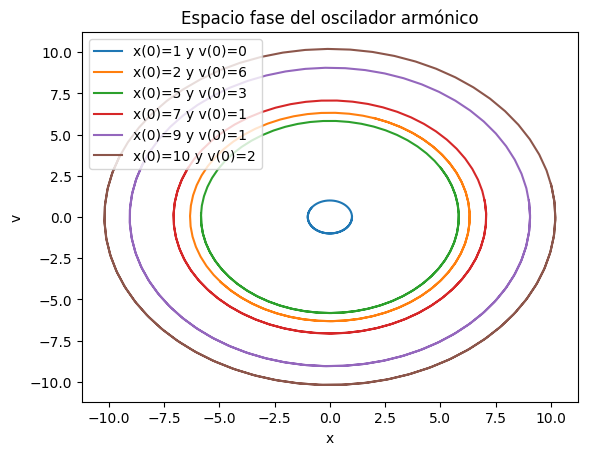

In [38]:

title("Espacio fase del oscilador armónico") 
plot(listp1,listv1,label = "x(0)=1 y v(0)=0");
legend()
plot(listp2,listv2,label = "x(0)=2 y v(0)=6");
legend()
plot(listp3,listv3,label = "x(0)=5 y v(0)=3");
legend()
plot(listp4,listv4,label = "x(0)=7 y v(0)=1");
legend()
plot(listp5,listv5,label = "x(0)=9 y v(0)=1");
legend()
plot(listp6,listv6,label = "x(0)=10 y v(0)=2");

xlabel("x"),ylabel("v")
legend()
;